In [58]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [5]:
# df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [6]:
# df

In [7]:
# df.columns

In [8]:
# X=df[['ATRIB_MED1', 'ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [9]:
# X

In [10]:
# X.info()

In [11]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [12]:
# X.info()

In [13]:
# y = df['Perda30']

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

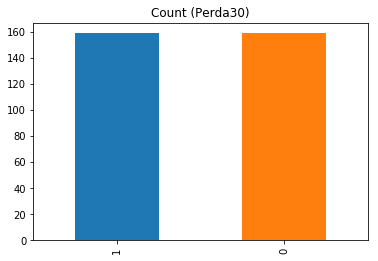

In [15]:
train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
test=pd.read_csv('baseProjetoTest.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['Perda30']

y_train = train['Perda30']

y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

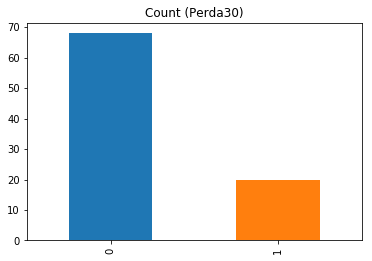

In [16]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

<br>
## RandomForest

In [17]:
steps = [('scaler', StandardScaler()),(('rf', RandomForestClassifier(n_estimators=200, max_features=8, max_depth=12)))]
pipeline = Pipeline(steps)

In [18]:
random_scaled = pipeline.fit(X_train, y_train)

In [19]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7613636363636364

In [20]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

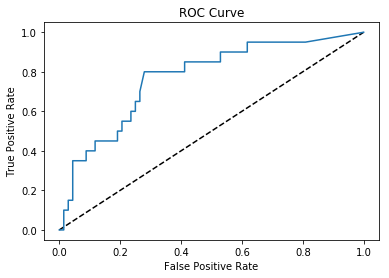

In [21]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
roc_auc_score(y_test, y_pred_prob)

0.7702205882352942

Confusion matrix, without normalization


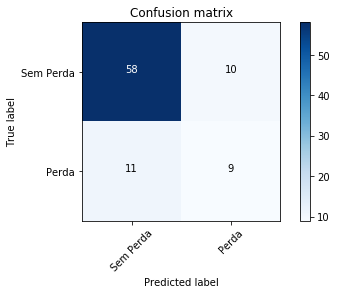

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix')

Confusion matrix, without normalization


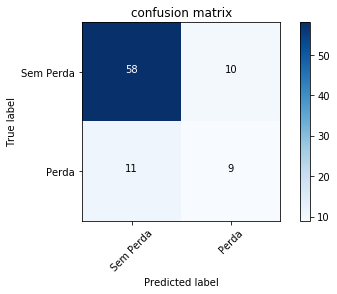

In [24]:
printcfm(y_test, y_pred,title='confusion matrix')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [25]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.85      0.85        68
          1       0.47      0.45      0.46        20

avg / total       0.76      0.76      0.76        88



## Fine-tunning the model.

In [26]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
parameters = {'n_estimators' : [400, 500, 600],
             'min_samples_split': np.arange(2, 5),
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [6,7,15],
             'bootstrap': [True,False],
             'warm_start': [True,False],
             'criterion' :['entropy']
             }
cv = GridSearchCV(rf, param_grid=parameters, verbose=3, n_jobs=-1, cv=5)
              #"max_depth": np.arange(1, 50),
              #"max_features": [1, 3, 10],
              
              #"min_samples_leaf": np.arange(1, 10),
              
              #"criterion": ["gini", "entropy"]

In [28]:
cv.fit(X_train, y_train);

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 12.8min finished


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.1s 
<br>[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
<br>[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
<br>[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
<br>[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.2min
<br>[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.8min
<br>[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 16.1min
<br>[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 21.0min
<br>[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.4min
<br>[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 32.3min
<br>[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 39.0min
<br>[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 46.5min
<br>[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 54.9min finished

In [29]:
print(cv.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 500, 'warm_start': True}


In [30]:
final_model =cv.best_estimator_

In [31]:
final_model

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

### Best Model Result (11/2018)
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

### Best Model Result (09/2018)
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

In [32]:
# final_model = RandomForestClassifier(bootstrap=False, class_weight=None,
#             criterion='entropy', max_depth=7, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=525, n_jobs=-1, oob_score=False, random_state=42,
#             verbose=0, warm_start=True)

## Predicting the Classes in Trainning Set

In [33]:
final_model.fit(X_train, y_train)

C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=True)

In [34]:
y_pred = final_model.predict(X_train)

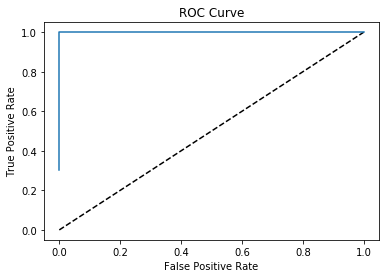

In [35]:
y_pred_prob = final_model.predict_proba(X_train)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
roc_auc_score(y_train, y_pred_prob)

1.0

In [37]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print(cv_scores)

[0.97 0.94 0.95 0.92 0.9 ]


Confusion matrix, without normalization


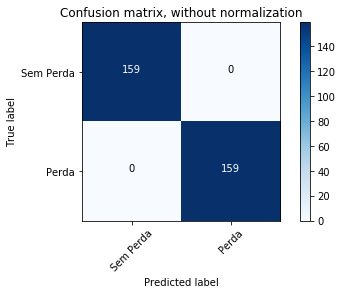

In [38]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


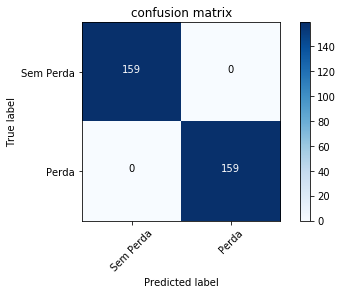

In [39]:
printcfm(y_train, y_pred, title='confusion matrix')

In [40]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       159
          1       1.00      1.00      1.00       159

avg / total       1.00      1.00      1.00       318



## Evaluating the model with Cross-Validation

In [41]:
y_pred_prob = final_model.predict_proba(X_train)[:,1]

In [42]:
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished


In [43]:
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished


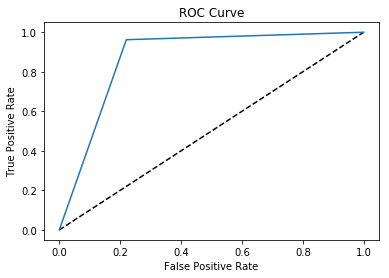

In [44]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.8710691823899371

Confusion matrix, without normalization


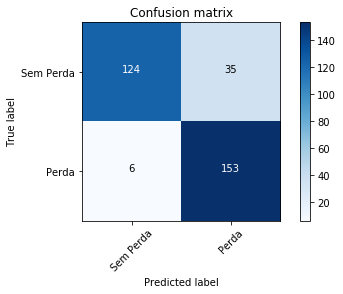

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix')

Confusion matrix, without normalization


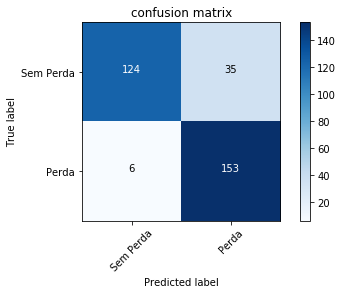

In [47]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [48]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86       159
          1       0.81      0.96      0.88       159

avg / total       0.88      0.87      0.87       318



## Predicting the Classes in Test Set

In [49]:
y_pred = final_model.predict(X_test)

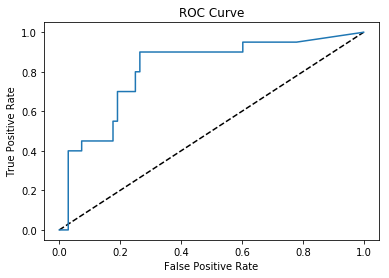

In [50]:
y_pred_prob = final_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
roc_auc_score(y_test, y_pred_prob)

0.8121323529411765

Confusion matrix, without normalization


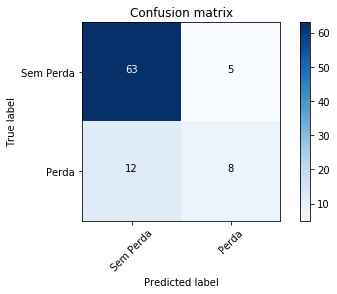

In [52]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix')

Confusion matrix, without normalization


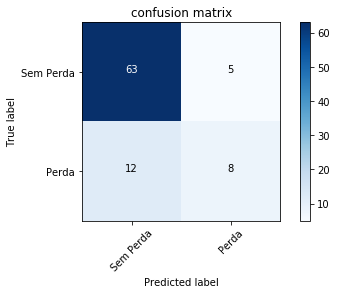

In [54]:
printcfm(y_test, y_pred, title='confusion matrix')

In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88        68
          1       0.62      0.40      0.48        20

avg / total       0.79      0.81      0.79        88



In [56]:
X=np.concatenate((X_train,X_test),axis=0)
y=np.append(y_train,y_test)

In [ ]:
print(__doc__)

param_range = np.arange(1, 800, 2)

train_scores, test_scores = validation_curve(
    final_model, X, y, param_name="n_estimators", param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel("$\gamma$")
plt.ylabel("AUC")
#plt.ylim(0.0, 1.1)
#plt.xlim(-1, 22)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


# Add learning curves